<a href="https://colab.research.google.com/github/shyakx/Data-Preprocessing-Group-8-Customer-spending-prediction-/blob/main/Data_Preprocessing_Group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Formative 2 - Data Preprocessing**

**Part 1: Data Augmentation on CSV Files**

**Objective:**
Expand the customer_transactions.csv dataset using synthetic data, perturbation, and augmentation techniques.

**Step 1: Load the Dataset**

We’ll start by loading the dataset and inspecting its structure.

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans


In [ ]:
data= pd.read_csv("/content/customer_transactions.csv")
data.head(5)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,customer_id_legacy,transaction_id,purchase_amount,customer_rating
count,150.000000,150.000000,150.000000,140.00000
mean,148.760000,1075.500000,280.780000,2.98500
std,30.046425,43.445368,121.329595,1.20699
min,100.000000,1001.000000,51.000000,1.00000
25%,121.250000,1038.250000,179.000000,1.95000
50%,150.500000,1075.500000,274.000000,3.00000
75%,174.750000,1112.750000,388.500000,4.00000
max,199.000000,1150.000000,495.000000,5.00000


In [ ]:
data.isna().sum()

,0
customer_id_legacy,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,10


In [ ]:
data.isnull().sum()

,0
customer_id_legacy,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,10


**Step 2: Data Cleaning & Handling**

Missing Values
We’ll handle missing values in the customer_rating column using mean imputation.



In [ ]:
#filling in missing values using
customer_mean= data["customer_rating"].mean()
data_mean = data["customer_rating"].fillna(customer_mean)

In [ ]:
data['customer_rating'].fillna(data['customer_rating'].mean(), inplace=True)
data.head(5)

<ipython-input-186-7929043b3874>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['customer_rating'].fillna(data['customer_rating'].mean(), inplace=True)


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


In [ ]:
data.isna().sum()

,0
customer_id_legacy,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,0


In [ ]:
data["product_category"].value_counts()

,count
product_category,
Sports,35
Electronics,34
Clothing,28
Groceries,28
Books,25


In [ ]:
encoder = LabelEncoder()
data["product_category"] = encoder.fit_transform(data["product_category"])
data.head(5)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,4,2.3
1,192,1002,332,2024-01-02,2,4.2
2,114,1003,442,2024-01-03,2,2.1
3,171,1004,256,2024-01-04,1,2.8
4,160,1005,64,2024-01-05,1,1.3


In [ ]:
data['customer_rating'] = pd.to_numeric(data['customer_rating'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    int64  
 5   customer_rating     150 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 7.2+ KB


In [ ]:
#filling in missing values using predictive modelling
X = data[['purchase_amount', 'product_category']]
y = data['customer_rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
X_train.head(5)

,purchase_amount,product_category
81,435,3
133,492,4
137,196,4
75,162,4
109,488,2


In [ ]:
missing_data = data[data['customer_rating'].isna()]
X_missing = missing_data[['customer_id_legacy', 'product_category','transaction_id','purchase_amount','product_category']]

predicted_values= data.loc[data['customer_rating'].isna(), 'customer_rating']


In [ ]:
data.head(5)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,4,2.3
1,192,1002,332,2024-01-02,2,4.2
2,114,1003,442,2024-01-03,2,2.1
3,171,1004,256,2024-01-04,1,2.8
4,160,1005,64,2024-01-05,1,1.3


In [ ]:
data.isna().sum()

,0
customer_id_legacy,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,0


In [ ]:
# Applying random noise to numerical purchase_amount
noise = np.random.uniform(-0.1, 0.1, size=len(data))
data['purchase_amount'] = data['purchase_amount'] * (1 + noise)

In [ ]:
data.head(5)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,429.156903,2024-01-01,4,2.3
1,192,1002,359.474001,2024-01-02,2,4.2
2,114,1003,457.731801,2024-01-03,2,2.1
3,171,1004,255.347557,2024-01-04,1,2.8
4,160,1005,67.695027,2024-01-05,1,1.3


In [ ]:
# Applying SMOTE
X = data[["purchase_amount","customer_rating"]]
y = data["product_category"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

data_smote = pd.DataFrame(X_resampled, columns=["purchase_amount","customer_rating"])
data_smote["product_category"] = y_resampled

data_smote["product_category"] = encoder.inverse_transform(y_resampled)
data_smote.head(5)

,purchase_amount,customer_rating,product_category
0,429.156903,2.3,Sports
1,359.474001,4.2,Electronics
2,457.731801,2.1,Electronics
3,255.347557,2.8,Clothing
4,67.695027,1.3,Clothing


In [ ]:
data['purchase_amount'] = np.log1p(data['purchase_amount'])
data.head(5)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,6.064150,2024-01-01,4,2.3
1,192,1002,5.887420,2024-01-02,2,4.2
2,114,1003,6.128466,2024-01-03,2,2.1
3,171,1004,5.546534,2024-01-04,1,2.8
4,160,1005,4.229677,2024-01-05,1,1.3


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['purchase_amount', 'customer_rating']])

synthetic_data = []
for cluster_id in data['cluster'].unique():
    cluster_center = kmeans.cluster_centers_[cluster_id]
    synthetic_data.append({
        'customer_id_legacy': 997,
        'transaction_id': 1323,
        'purchase_amount': cluster_center[0],
        'purchase_date': '2024-01-01',
        'product_category': data[data['cluster'] == cluster_id]['product_category'].mode()[0],
        'customer_rating': cluster_center[1]
    })

data = pd.concat([data, pd.DataFrame(synthetic_data)], ignore_index=True)
data = data.drop(columns=['cluster'])
data.tail(5)

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
148,189,1149,5.238404,2024-05-28,4,3.000000
149,113,1150,5.847610,2024-05-29,1,1.000000
150,997,1323,5.431514,2024-01-01,2,2.909483
151,997,1323,5.584739,2024-01-01,4,4.296078
152,997,1323,5.574203,2024-01-01,2,1.460976


In [ ]:
data.isna().sum()

,0
customer_id_legacy,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,0


In [ ]:
data.to_csv('customer_transactions_augmented.csv', index=False)

print("augmented data saved")

augmented data saved


# **Part 2: Merging Datasets with Transitive Properties**

In [ ]:
# Loading the datasets
transactions_df = pd.read_csv("customer_transactions_augmented.csv")
social_profiles_df = pd.read_csv("customer_social_profiles.csv")
id_mapping_df = pd.read_csv("id_mapping.csv")

In [ ]:
transactions_df.head()

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,6.064150,2024-01-01,4,2.3
1,192,1002,5.887420,2024-01-02,2,4.2
2,114,1003,6.128466,2024-01-03,2,2.1
3,171,1004,5.546534,2024-01-04,1,2.8
4,160,1005,4.229677,2024-01-05,1,1.3


In [ ]:
social_profiles_df.head()

,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,A178,LinkedIn,74,4.9,Positive
1,A190,Twitter,82,4.8,Neutral
2,A150,Facebook,96,1.6,Positive
3,A162,Twitter,89,2.6,Positive
4,A197,Twitter,92,2.3,Neutral


In [ ]:
id_mapping_df.head()

,customer_id_legacy,customer_id_new
0,195,A105
1,161,A118
2,192,A156
3,157,A168
4,166,A102


In [ ]:
# Merging both datasets
transactions_merged = transactions_df.merge(id_mapping_df, on="customer_id_legacy", how="left")

dataset_merged = transactions_merged.merge(social_profiles_df, on="customer_id_new", how="left")

dataset_merged

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,151,1001,6.064150,2024-01-01,4,2.300000,A176,Facebook,70.0,3.3,Negative
1,192,1002,5.887420,2024-01-02,2,4.200000,A156,Instagram,52.0,4.9,Positive
2,192,1002,5.887420,2024-01-02,2,4.200000,A108,NaN,NaN,NaN,NaN
3,192,1002,5.887420,2024-01-02,2,4.200000,A110,NaN,NaN,NaN,NaN
4,192,1002,5.887420,2024-01-02,2,4.200000,A140,LinkedIn,86.0,3.1,Negative
...,...,...,...,...,...,...,...,...,...,...,...
377,189,1149,5.238404,2024-05-28,4,3.000000,A173,Facebook,78.0,3.9,Negative
378,113,1150,5.847610,2024-05-29,1,1.000000,A196,Instagram,85.0,3.9,Negative
379,997,1323,5.431514,2024-01-01,2,2.909483,NaN,NaN,NaN,NaN,NaN
380,997,1323,5.584739,2024-01-01,4,4.296078,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Handling conflicts
# Finding the most frequently occurring customer_id_new for each customer_id_legacy
id_counts = dataset_merged.groupby("customer_id_legacy")["customer_id_new"].agg(lambda x: x.mode()[0] if not x.isna().all() else "Unknown_ID")

transactions_merged["customer_id_new"] = transactions_merged["customer_id_legacy"].map(id_counts)

cleaned_dataset = transactions_merged.merge(social_profiles_df, on="customer_id_new", how="left")

cleaned_dataset.fillna({
    "social_media_platform": "Unknown",
    "engagement_score": cleaned_dataset["engagement_score"].median(),
    "purchase_interest_score": cleaned_dataset["purchase_interest_score"].median(),
    "review_sentiment": "Neutral"
}, inplace=True)

cleaned_dataset

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,151,1001,6.064150,2024-01-01,4,2.300000,A176,Facebook,70.0,3.3,Negative
1,192,1002,5.887420,2024-01-02,2,4.200000,A108,Unknown,78.0,3.3,Neutral
2,192,1002,5.887420,2024-01-02,2,4.200000,A108,Unknown,78.0,3.3,Neutral
3,192,1002,5.887420,2024-01-02,2,4.200000,A108,Unknown,78.0,3.3,Neutral
4,192,1002,5.887420,2024-01-02,2,4.200000,A108,Unknown,78.0,3.3,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
496,189,1149,5.238404,2024-05-28,4,3.000000,A173,Facebook,78.0,3.9,Negative
497,113,1150,5.847610,2024-05-29,1,1.000000,A196,Instagram,85.0,3.9,Negative
498,997,1323,5.431514,2024-01-01,2,2.909483,Unknown_ID,Unknown,78.0,3.3,Neutral
499,997,1323,5.584739,2024-01-01,4,4.296078,Unknown_ID,Unknown,78.0,3.3,Neutral


In [ ]:
# Creating Customer Engagement Score
cleaned_dataset["customer_engagement_score"] = (
    0.4 * cleaned_dataset["purchase_amount"] +
    0.3 * cleaned_dataset["engagement_score"] +
    0.3 * cleaned_dataset["purchase_interest_score"]
)

print(cleaned_dataset[["customer_id_legacy", "customer_engagement_score"]].head())

   customer_id_legacy  customer_engagement_score
0                 151                  24.415660
1                 192                  26.744968
2                 192                  26.744968
3                 192                  26.744968
4                 192                  26.744968


In [ ]:
# Moving averages of transaction
cleaned_dataset["purchase_date"] = pd.to_datetime(cleaned_dataset["purchase_date"])

cleaned_dataset["moving_avg_7d"] = (
    cleaned_dataset.sort_values("purchase_date")
    .groupby("customer_id_legacy")["purchase_amount"]
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

print(cleaned_dataset[["customer_id_legacy", "moving_avg_7d"]].head())

   customer_id_legacy  moving_avg_7d
0                 151        6.06415
1                 192        5.88742
2                 192        5.88742
3                 192        5.88742
4                 192        5.88742


In [ ]:
# Time-based aggregation of purchase

cleaned_dataset["purchase_month"] = cleaned_dataset["purchase_date"].dt.to_period("M")

monthly_spending = cleaned_dataset.groupby(["customer_id_legacy", "purchase_month"])["purchase_amount"].sum().reset_index()
monthly_spending.rename(columns={"purchase_amount": "monthly_spending"}, inplace=True)

cleaned_dataset = cleaned_dataset.merge(monthly_spending, on=["customer_id_legacy", "purchase_month"], how="left")

print(cleaned_dataset[["customer_id_legacy", "purchase_month", "monthly_spending"]].head())

   customer_id_legacy purchase_month  monthly_spending
0                 151        2024-01          6.064150
1                 192        2024-01         23.549679
2                 192        2024-01         23.549679
3                 192        2024-01         23.549679
4                 192        2024-01         23.549679


In [ ]:
# TF-IDF on customer reviews or social media comments.

sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
cleaned_dataset["review_sentiment_numeric"] = cleaned_dataset["review_sentiment"].map(sentiment_mapping)

print(cleaned_dataset[["customer_id_legacy", "review_sentiment", "review_sentiment_numeric"]].head())

   customer_id_legacy review_sentiment  review_sentiment_numeric
0                 151         Negative                        -1
1                 192          Neutral                         0
2                 192          Neutral                         0
3                 192          Neutral                         0
4                 192          Neutral                         0


In [ ]:
cleaned_dataset

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment,customer_engagement_score,moving_avg_7d,purchase_month,monthly_spending,review_sentiment_numeric
0,151,1001,6.064150,2024-01-01,4,2.300000,A176,Facebook,70.0,3.3,Negative,24.415660,6.064150,2024-01,6.064150,-1
1,192,1002,5.887420,2024-01-02,2,4.200000,A108,Unknown,78.0,3.3,Neutral,26.744968,5.887420,2024-01,23.549679,0
2,192,1002,5.887420,2024-01-02,2,4.200000,A108,Unknown,78.0,3.3,Neutral,26.744968,5.887420,2024-01,23.549679,0
3,192,1002,5.887420,2024-01-02,2,4.200000,A108,Unknown,78.0,3.3,Neutral,26.744968,5.887420,2024-01,23.549679,0
4,192,1002,5.887420,2024-01-02,2,4.200000,A108,Unknown,78.0,3.3,Neutral,26.744968,5.887420,2024-01,23.549679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,189,1149,5.238404,2024-05-28,4,3.000000,A173,Facebook,78.0,3.9,Negative,26.665361,5.520035,2024-05,10.476807,-1
497,113,1150,5.847610,2024-05-29,1,1.000000,A196,Instagram,85.0,3.9,Negative,29.009044,5.760336,2024-05,5.847610,-1
498,997,1323,5.431514,2024-01-01,2,2.909483,Unknown_ID,Unknown,78.0,3.3,Neutral,26.562606,5.431514,2024-01,16.590456,0
499,997,1323,5.584739,2024-01-01,4,4.296078,Unknown_ID,Unknown,78.0,3.3,Neutral,26.623896,5.508127,2024-01,16.590456,0


In [ ]:
# Calculating TF-IDF scores for review_sentiment column
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer.fit(cleaned_dataset['review_sentiment'])

tfidf_matrix = vectorizer.transform(cleaned_dataset['review_sentiment'])

print(tfidf_matrix.toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
# Save the cleaned dataset
cleaned_dataset.to_csv("final_customer_data_[Group 8].csv", index=False)
print("Final dataset saved as 'final_customer_data_[Group 8].csv'")

Final dataset saved as 'final_customer_data_[Group 8].csv'


**PART 3: Data Consistency and Quality Checks**
****
**Objective:**

Ensure the preprocessed dataset is clean, structured, and machine learning-ready.

**Step 1: Data Integrity Checks**

Check for duplicates, missing values, and inconsistent mappings.

In [ ]:
# Check for duplicates
print("Number of duplicates:", cleaned_dataset.duplicated().sum())

# Check for missing values
print(cleaned_dataset.isnull().sum())

# Validate customer IDs
print("Unique customer_id_legacy:", cleaned_dataset['customer_id_legacy'].nunique())
print("Unique customer_id_new:", cleaned_dataset['customer_id_new'].nunique())

Number of duplicates: 142
customer_id_legacy           0
transaction_id               0
purchase_amount              0
purchase_date                0
product_category             0
customer_rating              0
customer_id_new              0
social_media_platform        0
engagement_score             0
purchase_interest_score      0
review_sentiment             0
customer_engagement_score    0
moving_avg_7d                0
purchase_month               0
monthly_spending             0
review_sentiment_numeric     0
dtype: int64
Unique customer_id_legacy: 76
Unique customer_id_new: 46


**Step 2: Statistical Summarization**

Generate summary statistics and visualize distributions.

       customer_id_legacy  transaction_id  purchase_amount  \
count          501.000000      501.000000       501.000000   
mean           156.071856     1068.139721         5.529915   
min            100.000000     1001.000000         3.934975   
25%            125.000000     1026.000000         5.254287   
50%            152.000000     1061.000000         5.589112   
75%            180.000000     1107.000000         5.962492   
max            997.000000     1323.000000         6.290405   
std             72.281912       48.451341         0.490086   

                       purchase_date  product_category  customer_rating  \
count                            501        501.000000       501.000000   
mean   2024-03-06 05:04:40.239521024          2.069860         2.950233   
min              2024-01-01 00:00:00          0.000000         1.000000   
25%              2024-01-25 00:00:00          1.000000         2.000000   
50%              2024-02-29 00:00:00          2.000000         2.9

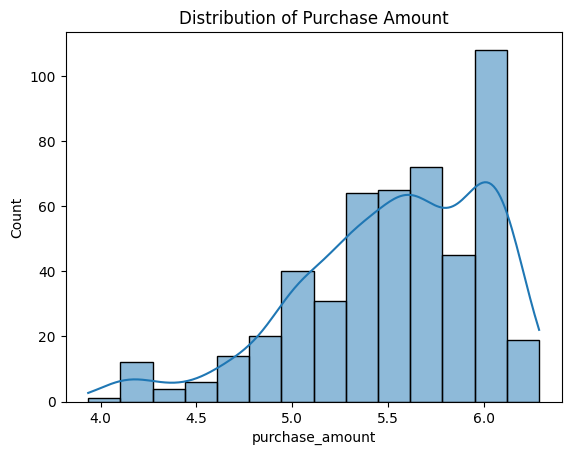

In [ ]:
# Summary statistics for numerical columns
print(cleaned_dataset.describe())

# Visualize distribution of purchase_amount
sns.histplot(cleaned_dataset['purchase_amount'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()

**Step 3: Feature Selection for Machine Learning**

Identify highly correlated features and select the top 10 most important features.

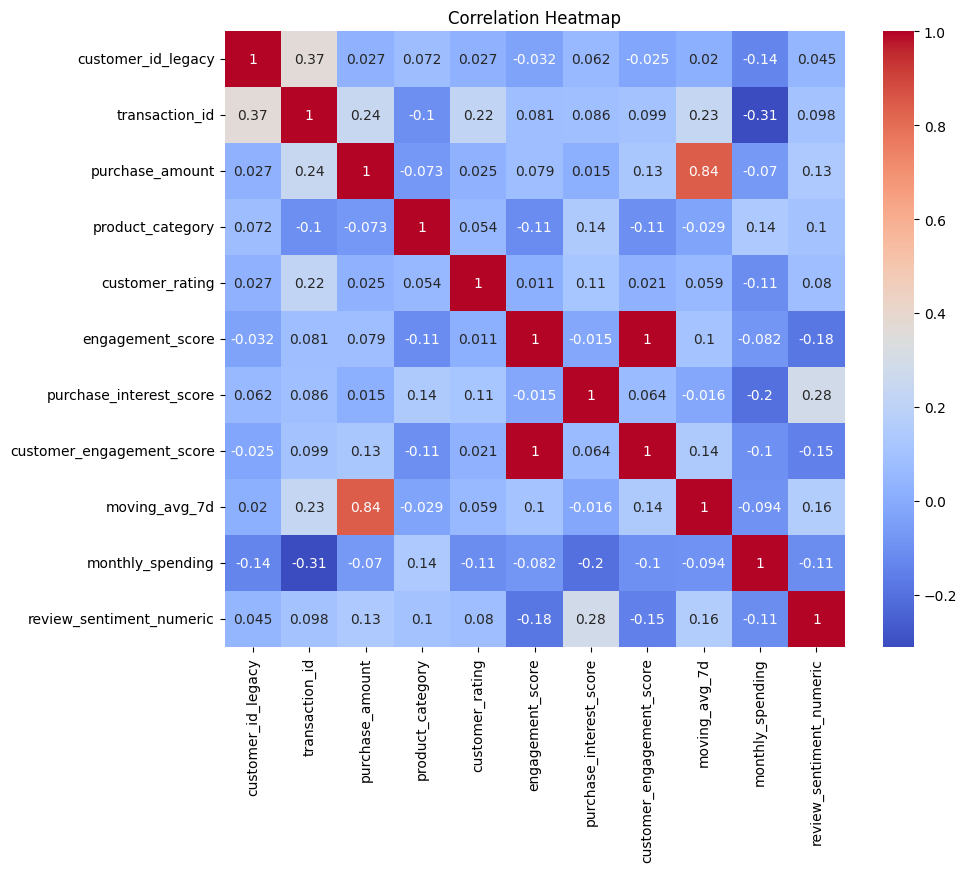

Top 10 Features:
                      Feature  Importance
6  customer_engagement_score    0.995884
5    purchase_interest_score    0.002273
0         customer_id_legacy    0.000483
9   review_sentiment_numeric    0.000349
8           monthly_spending    0.000346
4            customer_rating    0.000258
1             transaction_id    0.000157
7              moving_avg_7d    0.000118
2            purchase_amount    0.000102
3           product_category    0.000030


In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Exclude the 'purchase_month' column from correlation calculation
sns.heatmap(cleaned_dataset.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Select top 10 features using feature importance (e.g., RandomForest)
from sklearn.ensemble import RandomForestRegressor

# Exclude the 'purchase_month' column from the features
X = cleaned_dataset.select_dtypes(include=np.number).drop(columns=['engagement_score'])
y = cleaned_dataset['engagement_score']

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Features:\n", top_10_features)

**Step 4: Final Data Export**

Save the final dataset for machine learning.

In [ ]:
cleaned_dataset.to_csv('final_dataset_ready_[group8].csv', index=False)

****
**Bonus Challenge: Apply a Machine Learning Model to Predict Customer Spending**

We’ll use the final preprocessed dataset (final_dataset_ready_[group8].csv) to train a Random Forest Regression model and predict customer spending behavior.


**Step 1: Load the Final Preprocessed Dataset**

If you’ve already loaded the dataset in Part 3, you can skip this step. Otherwise, load it now.

In [ ]:
import pandas as pd

# Load the final preprocessed dataset
df = pd.read_csv('/content/final_dataset_ready_[group8].csv')

# Display the first few rows
print(df.head())

   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001          6.06415    2024-01-01   
1                 192            1002          5.88742    2024-01-02   
2                 192            1002          5.88742    2024-01-02   
3                 192            1002          5.88742    2024-01-02   
4                 192            1002          5.88742    2024-01-02   

   product_category  customer_rating customer_id_new social_media_platform  \
0                 4              2.3            A176              Facebook   
1                 2              4.2            A108               Unknown   
2                 2              4.2            A108               Unknown   
3                 2              4.2            A108               Unknown   
4                 2              4.2            A108               Unknown   

   engagement_score  purchase_interest_score review_sentiment  \
0              70.0              

****
****
**Step 2: Prepare the Data for Machine Learning**

We’ll prepare the data by:

A. Selecting features and target variable.

B. Splitting the data into training and testing sets.

C. Scaling numerical features (if necessary).
****
**1. Select Features and Target Variable**

Target Variable: purchase_amount (we want to predict customer spending).

Features: Use the top 10 features identified in Part 3 (or all relevant features).

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['purchase_amount'])  # Drop the target variable
y = df['purchase_amount']  # Target variable

**2. Split the Data into Training and Testing Sets**

We’ll use 80% of the data for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (400, 10)
Testing data shape: (101, 10)


**3. Scale Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

**Step 3: Train a Random Forest Regression Model**

We’ll use Random Forest Regression to predict customer spending.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

**Step 4: Evaluate the Model**

We’ll evaluate the model using:

**1. Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.

**2. R² Score:** Measures the proportion of variance in the target variable that’s predictable from the features.

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.19517722772277235
R² Score: 0.9988129587630464


**Step 5: Feature Importance**

Random Forest provides feature importance scores, which tell us which features are most influential in predicting customer spending.

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances, ensuring 'Feature' and 'Importance' have the same length:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# We use X_train.columns here assuming it has the original feature names

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

                     Feature  Importance
6  customer_engagement_score    0.995532
5    purchase_interest_score    0.002483
0         customer_id_legacy    0.000477
4            customer_rating    0.000406
8           monthly_spending    0.000352
9   review_sentiment_numeric    0.000333
1             transaction_id    0.000151
2            purchase_amount    0.000109
7              moving_avg_7d    0.000086
3           product_category    0.000071


**Visualize Predictions vs Actual Values**

Visualize how well the model’s predictions match the actual values.

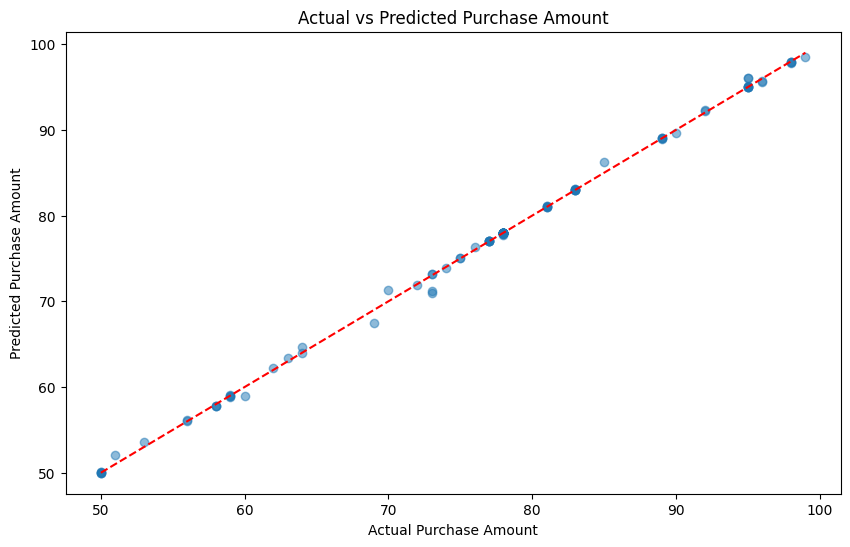

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs Predicted Purchase Amount')
plt.show()

**Save the Model**

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'customer_spending_model.pkl')

['customer_spending_model.pkl']